

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>







<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>




# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

Plano inicial:
Leia os 5 arquivos recebidos pertencentes à empresa Instacart, como já vimos, eles possuem extensão .CSV, portanto devemos determinar os seguintes parâmetros para a correta leitura de cada arquivo: 

1)	O delimitador (caractere de exibição ou separação de colunas, usarei uma impressão das 5 primeiras linhas do DataFrame para observar qual é o delimitador)

2)	Na mesma visualização, verificarei se devemos passar um parâmetro que configure os decimais em colunas de números de ponto flutuante.

3)	E por fim verificarei se os nomes das colunas estão corretos em sua descrição (se possui os formatos corretos para uma coluna)

Com este plano acredito que conseguiremos visualizar e corrigir qualquer anomalia na leitura dos arquivos

In [1]:
import pandas as pd # Importe as bibliotecas
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# ///////////////////////////////////// LENDO OS ARQUIVOS ///////////////////////////////////////////////////

df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep =';') # leia os conjuntos de dados em DataFrames
df_products = pd.read_csv ('/datasets/products.csv', sep = ';')
df_order_products = pd.read_csv ('/datasets/order_products.csv', sep = ';')
df_aisles = pd.read_csv ('/datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv ('/datasets/departments.csv', sep =';')



# ////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE DATAFRAME EXPLÍCITOS ////////////////////////////////////////
# Definimos uma função que permita recebir um DataFrame e retorne todas as linhas duplicadas assim como a quantidade total de linhas
# Aplicamos o método duplicated() para atribuir a um DataFrame auxiliar com variavel local:aux_df_duplicado os valores duplicados explicitos
# Aplicamos ao DataFrame recebido os metodos duplicated() e sum() para obter as quantidades de linhas duplicadas e atribuímos esse valor à variavel tam_df_duplicado
# Comparamos as quantidades com a condição se são maior do que 0 (zero) é porque tem linhas duplicadas se não, quer dizer que não temos duplicados explicitos nesse DataFrame
# A função vai retornar o DataFrame com linhas duplicadas e as quantiidades de linhas

def df_duplicado (df):                                                         
    aux_df_duplicado = df[df.duplicated()]
    tam_df_duplicado = df.duplicated().sum()
    if tam_df_duplicado > 0:
        return print(f"{aux_df_duplicado}, Quantidade de duplicados explicitos na tabela é = {tam_df_duplicado}")
       
    else:
        return print(f"Quantidade de duplicados explicitos na tabela é = {tam_df_duplicado}")
    
    
    
# ////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE SERIES EXPLÍCITOS ////////////////////////////////////////
# Definimos uma função que permita recebir uma Serie (parametro: DataFrame e nome da coluna) e retorne todas as linhas duplicadas assim como a quantidade total de linhas
# Aplicamos o método value_count() á coluna para obter os valores unívocos e sua quantidade e atribuimos para uma variavel aux_serie_duplicado
# Atribuimos todos os valores resultante de filtrar a coluna com seus valores booleanos a uma vaivel mascara onde estejam os valores maior que 1 garantindo que os valores estejam mais de uma vez na coluna
# Aplicamos o metodo index passando os valores da mascara com os valores duplicado na coluna e atribuimos na variavel, para criar a serie com os valores duplicados na coluna
# A função vai retornar uma serie com os valores duplicados explicitos e as quantiidades de valores pode ser zero ou uma lista se tiver
 
def serie_duplicado (serie,column):
    aux_serie_duplicado = serie[column].value_counts()
    mascara = aux_serie_duplicado > 1
    duplicado = aux_serie_duplicado.index[mascara]
    if len(duplicado) > 1:
        return print(f"{duplicado}, Quantidade de valores duplicados implicitos na culuna {coluna} é = {len(duplicado)}")
    else:
        return print(f"Quantidade de valores duplicados implicitos na culuna {coluna} é = {len(duplicado)}")

    

# ////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE SERIES LISTA EXPLÍCITOS ////////////////////////////////////////
# Definimos uma função que permita recebir uma Serie (parametro: DataFrame e nome da coluna) e retorne todas as linhas duplicadas assim como a quantidade total de linhas
# Aplicamos o método value_count() á coluna para obter os valores unívocos e sua quantidade e atribuimos para uma variavel aux_serie_duplicado
# Atribuimos todos os valores resultante de filtrar a coluna com seus valores booleanos a uma vaivel mascara onde estejam os valores maior que 1 garantindo que os valores estejam mais de uma vez na coluna
# Aplicamos o metodo index passando os valores da mascara com os valores duplicado na coluna e atribuimos na variavel, para criar a serie com os valores duplicados na coluna
# A função vai retornar uma LISTA com os valores duplicados explicitos ou uma menssagem se não tiver duplicados 
   
def serie_duplicado_lista (serie,column):
    aux_serie_duplicado = serie[column].value_counts()
    mascara = aux_serie_duplicado > 1
    duplicado = aux_serie_duplicado.index[mascara]
    if len(duplicado) > 1:
        duplicado = list(duplicado)
        return duplicado
    else:
        return print(f"Quantidade de valores duplicados implicitos na culna {coluna} é = {len(duplicado)}")

    
#/////////// DESCRIÇÃO DA FUNÇÃO SUBSTITUIR VALORES AUSENTES EM UMA COLUMA /////////////////////  
# A função recibe como parametros um DataFrame, nome de uma coluna e o valor para preencher os valores ause
# Criamos uma lista com os nomes das colunas onde temos valores ausentes para serem repetidos nos ciclos de iteração com a coluna recebida (serie) como parametro
# Criamos um ciclo 'for' para percorrer a tabela naa coluna especificada
# Aplicamos o metodo fillna() e utilizamos o valor recebido para preencher os valores ausentes
# A função retorna DataFrama recebido com os valores ausente preenchidos na coluna especificada
    
def substituir_nan_coluna (df,column,valor):
    for coluna in column:
        df[coluna].fillna(valor, inplace=True)
    return df



#////// DESCRIÇÃO DA FUNÇÃO UNIR COLUMA: CRIADA PARA UNIR VALORES DE DUAS COLUNAS ('product_name' e 'product_id')  ////////////////  
# A função vai ser utilizada com outra função apply() para indicar as modificaões para ser aplicada na coluna criada
# Neste caso queremos unir os valores de duas colunas de um DataFrame
# Retorna o valor juntado

def uniao_coluna(row):
    sku = row['product_id']
    nome = row['product_name']
    espaço = ' '
    mistura = nome + espaço + sku
    return mistura



In [3]:
# imprima as informações sobre o DataFrame

df_instacart_orders.info() 
print('///////////////////////////////////////////////////////////////////////////////')
print(df_instacart_orders.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
///////////////////////////////////////////////////////////////////////////////
           order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000      

In [4]:
# imprima as informações sobre o DataFrame

df_products.info() 
print('///////////////////////////////////////////////////////////////////////////////')
print(df_products.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
///////////////////////////////////////////////////////////////////////////////
          product_id            product_name      aisle_id  department_id
count   49694.000000                   48436  49694.000000   49694.000000
unique           NaN                   48436           NaN            NaN
top              NaN  Diet Vanilla Root Beer           NaN            NaN
freq             NaN                       1           NaN            NaN
mean    24847.500000                     NaN     67.773192      11.728478
std     14345.566475                     NaN     38.317265  

In [5]:
# imprima as informações sobre o DataFrame

df_order_products.info(show_counts = True) 
print('///////////////////////////////////////////////////////////////////////////////')
print(df_order_products.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
///////////////////////////////////////////////////////////////////////////////
           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  

In [6]:
# imprima as informações sobre o DataFrame

df_aisles.info() 
print('///////////////////////////////////////////////////////////////////////////////')
print(df_aisles.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
///////////////////////////////////////////////////////////////////////////////
          aisle_id         aisle
count   134.000000           134
unique         NaN           134
top            NaN  refrigerated
freq           NaN             1
mean     67.500000           NaN
std      38.826537           NaN
min       1.000000           NaN
25%      34.250000           NaN
50%      67.500000           NaN
75%     100.750000           NaN
max     134.000000           NaN


In [7]:
df_departments.info() # imprima as informações sobre o DataFrame
print('///////////////////////////////////////////////////////////////////////////////')
print(df_departments.describe(include='all'))  # Verificar que as colunas id realmente são numeros inteiros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
///////////////////////////////////////////////////////////////////////////////
        department_id department
count       21.000000         21
unique            NaN         21
top               NaN       pets
freq              NaN          1
mean        11.000000        NaN
std          6.204837        NaN
min          1.000000        NaN
25%          6.000000        NaN
50%         11.000000        NaN
75%         16.000000        NaN
max         21.000000        NaN


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Embora qualquer nome de id não precise necessariamente ser correlativo, ver os valores mínimo e máximo nos permite verificar se temos um valor atípico na coluna.

Para o caso específico das 5 tabelas obtidas, o mais interessante do meu ponto de vista é que com a primeira visualização posso concluir rapidamente que se aplicássemos uma normalização das 5 tabelas vemos que poderíamos unir as 5 numa só, vendo assim a rastreabilidade das informações.

Podemos perceber que temos uma inter-relação entre as tabelas através de suas identificações de ID, por exemplo as tabelas (aisle e departments) estão vinculadas à tabela de produtos (poderíamos dizer que aisle e departments são atributos do produto assim como nome e seu identificação ID) Da mesma forma, podemos observar que a tabela de produtos (products) está relacionada à tabela de pedidos de produtos (order_products) através do 'product_id' e por fim as tabelas (instacart_orders e order_products) está relacionada ao atributo 'order_id'.

Após esta breve descrição, o importante é observar que as tabelas estão relacionadas e cada uma armazena informações importantes para cada atributo requerido para cada tabela.

Também temos dados faltantes sobre:
1) Tabela Instacart_orders (pedidos no aplicativo) na coluna 'days_since_prior_order' (quantidade de dias desde que o cliente fez o pedido), é importante saber se a empresa possui política de dias de espera, determinar as consequências do não cumprimento dela bem como revisar as causas da falha na ausência de informações.

2) Tabela de products (tabela onde estão os produtos que os clientes podem comprar) na coluna 'product_name', é importante determinar as causas da ausência de valores faltantes nesta tabela para determinar se o produto realmente existe.

3) Tabela order_products (um item incluído em um pedido) possui valores faltantes na coluna ‘add_to_cart_order’ (ordem sequencial que cada item foi colocado no carrinho)

Referente a la Tabela que registra os pedidos realizados no aplicativa da instacart podemos observar que nossa amostra contém 478952 numeros de pedidos para ser analisados.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados


Para limpar os dados, avaliarei primeiro os dados duplicados e depois os valores faltantes para visualizar o grau de importância dos dados que pretendemos eliminar ou substituir e se precisarmos preencher valores, determinar qual o melhor as opções dependeriam do tipo de dado variável e das consequências que isso gerará no conjunto total de dados.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [8]:
# Verificar se há pedidos duplicados

df_duplicado(df_instacart_orders)    # Aplicamos a função desenvolvida para duplicados explicitos 


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim temos 15 linhas duplicadas, todos os valores das colunas têm em comum: 'order_dow' e 'order_hour_of_day' valores de 3 e 2 respectivamente

In [9]:
# Com base nas suas conclusões,

ordenes_2hrs = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3) ] # Filtrando todos os feitos às 2h da manhã nas quartas-feiras
ordenes_2hrs.info()                                                                                                            # Para conseguir visualizar as propiedades da tabela filtrada
print()
print(ordenes_2hrs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3

O que esse resultado quer dizer?

Diz que naquele dia e naquela hora tivemos 121 pedidos feitos no aplicativo

In [10]:
# Remova pedidos duplicados

df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True) 

In [11]:
# Verifique as linhas duplicadas mais uma vez

df_duplicado(df_instacart_orders)    # Aplicamos a função desenvolvida para duplicados explicitos 


Quantidade de duplicados explicitos na tabela é = 0


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados

coluna = 'order_id'
serie_duplicado(df_instacart_orders,coluna)

Quantidade de valores duplicados implicitos na culuna order_id é = 0


Descreva brevemente suas conclusões e o que você fez com elas.

Com a aplicação dos procedimentos anteriores podemos definir que temos uma tabela sem duplicados explícitos no DataFrame: df_instacart_orders e sem duplicados implícitos na coluna chave 'order_id' para relacionar com a informação associada à tabela df_order_products

### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas
df_duplicado(df_products)

Quantidade de duplicados explicitos na tabela é = 0


In [14]:
# Verifique apenas se há IDs de departamentos duplicados
coluna = 'department_id'
serie_duplicado(df_products, coluna)

Int64Index([11, 19, 13, 7, 1, 16, 17, 15, 9, 4, 3, 20, 21, 6, 14, 18, 5, 8, 12,
            2, 10],
           dtype='int64'), Quantidade de valores duplicados implicitos na culuna department_id é = 21


In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

df_products['product_name'] = df_products['product_name'].str.lower()

coluna= 'product_name'
serie_duplicado(df_products, coluna)



Index(['green tea with ginseng and honey', 'matzo ball mix',
       'cosmic brownies with chocolate chip candy', 'edamame soybeans in pods',
       'mozzarella sticks with marinara sauce', 'leave-in conditioner',
       'bag of oranges', 'hearts of palm', 'original potato chips',
       'balsamic vinegar of modena',
       ...
       'maraschino cherries with stems', 'crushed tomatoes with basil',
       'rigatoni with chicken & pesto', 'vitamin d3 5000 iu',
       'dulce de leche caramel ice cream', 'beef chili with beans',
       'vitamin d3 1000 iu', 'ibuprofen tablets 200 mg',
       'mandarin oranges in light syrup', 'chunk light tuna in vegetable oil'],
      dtype='object', length=103), Quantidade de valores duplicados implicitos na culuna product_name é = 103


In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando

coluna= 'product_name'
serie_duplicados =serie_duplicado_lista(df_products, coluna)
print(serie_duplicados)
print()
filtro_nome = df_products[df_products['product_name'].isin(serie_duplicados)]['product_name']
print(filtro_nome)


['green tea with ginseng and honey', 'matzo ball mix', 'cosmic brownies with chocolate chip candy', 'edamame soybeans in pods', 'mozzarella sticks with marinara sauce', 'leave-in conditioner', 'bag of oranges', 'hearts of palm', 'original potato chips', 'balsamic vinegar of modena', '18-in-1 hemp peppermint pure-castile soap', 'skinless & boneless sardines in olive oil', 'solid white albacore tuna in spring water', 'lasagna with meat sauce', 'mountain berry blast sports drink', 'biotin 1000 mcg', "tender white meat chicken- vegetables & rice in a cheddar cheese sauce grandma's chicken & vegetable rice bake", 'lavender & chamomile baby powder', 'wild sardines in spring water', 'carrot and celery sticks', 'protein plus vanilla bean protein shake', 'solid white albacore tuna in water', 'apricot energy bar', 'anchovy fillets in olive oil', 'high performance energy drink', 'chicken in a biskit baked snack crackers', 'spreadable butter with canola oil', 'yams cut sweet potatoes in syrup', 'm

Descreva brevemente suas conclusões e o que você fez com elas.

A tabela df_products possui os IDs chave de outras tabelas, talvez seja a que tem mais relacionamentos, mas é importante ressaltar que se a classificação e estrutura dos códigos dos produtos por localização estiver correta, teremos vários produtos de categorias semelhantes com classificações em departamentos e corredores iguais de acordo com os critérios de classificação da empresa é por isso que podemos ver vários produtos com códigos de identificação de chave diferentes com valores duplicados em departamentos e corredores.

por exemplo: Rufles ID1, Doritos ID2, apenas estes dois produtos são encontrados nos departamentos de snacks e na mesma seção com a certeza de que estes, assim como outros produtos, atendem a um critério de classificação imputado pela empresa, é por isso que observamos muitos produtos com os mesmos departamentos e seções, pois a empresa tem que ter uma organização física e fluxo de informações (estrutura de código, localização de produtos, entre outros).

É interessante analisar as duas últimas indicações, principalmente a última (Verifique os nomes de produtos duplicados que não estão faltando), Se observarmos a quantidade de produtos duplicados temos uma quantidade de 103 itens duplicados ou com pelo menos mais de dois na coluna.

mas quando vamos para o outro ponto dos produtos duplicados não faltantes, podemos entender que os produtos duplicados não faltantes são os mesmos produtos duplicados, só que transformando as duplicatas daquela coluna em uma lista e filtrando a coluna apenas aquela desta vez vamos aplicar o método isin() para obter todos os valores da coluna que corresponde à lista filtrada obtemos 207 elementos na coluna.

Esses resultados nos dizem que pode não apenas haver nomes duplicado, mas até mesmo um item pode estar triplicado.

É importante entender que a tabela de cadastro dos códigos referentes aos produtos que estão entrando no estoque ou que já estão lá refletem a movimentação de cada código e seu fluxo por todas as operações associadas aos processos de marketing da loja. evitar duplicação de produtos.

O facto dos nomes estarem duplicados não significa que o seu ID também esteja duplicado, e aqui está a importância, pois se tivermos um produto com nome duplicado, a informação armazenada no seu ID não pode corresponder 100% aos movimentos de cada produto (vendas, compras, reposição, entre outros) assim tendo, por exemplo:

    product_id	   product_name
   
       1                A
   
       2                A

Todo o fluxo de informação referente a cada ID é incerto, no melhor dos casos a solução seria reunir toda a informação num dos 2 IDs e eliminar ou reatribuir o outro para garantir que 100% dos valores reflectidos por cada um ID e portanto de cada PRODUTO é realmente o indicado

### DataFrame `departments`

In [17]:
# Verifique se há linhas completamente duplicadas

df_duplicado(df_departments)

Quantidade de duplicados explicitos na tabela é = 0


In [18]:
# Verifique apenas se há IDs dos produtos duplicados

coluna= 'department_id'
serie_duplicado(df_departments, coluna)

Quantidade de valores duplicados implicitos na culuna department_id é = 0


Descreva brevemente suas conclusões e o que você fez com elas.

Na tabela de departments não temos valores duplicados, apliquei a funções já criada para duplicados explicitos em DataFrame e series para cumprir os requisitos solicitados

### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas

df_duplicado(df_aisles)

Quantidade de duplicados explicitos na tabela é = 0


In [20]:
# Verifique apenas se há IDs dos produtos duplicados

coluna= 'aisle_id'
serie_duplicado(df_aisles, coluna)

Quantidade de valores duplicados implicitos na culuna aisle_id é = 0


Descreva brevemente suas conclusões e o que você fez com elas.

Na tabela de aisles não temos valores duplicados, apliquei a funções já criada para duplicados explicitos em DataFrame e series para cumprir os requisitos solicitados

### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas

df_duplicado(df_order_products)

Quantidade de duplicados explicitos na tabela é = 0


In [22]:
# Verifique mais uma vez se há outros casos complicados de duplicados

coluna= 'order_id'
serie_duplicado(df_order_products, coluna)
print()
print(df_order_products[df_order_products['order_id'] == 61355])

Int64Index([  61355, 3308010, 2136777,  171934, 1959075,  102236, 1730767,
            1800005, 2926893, 1386261,
            ...
            3185938, 3227821, 2245503, 2887354, 2556919, 1969639,  146246,
             747496, 2024875, 1738023],
           dtype='int64', length=428199), Quantidade de valores duplicados implicitos na culuna order_id é = 428199

         order_id  product_id  add_to_cart_order  reordered
57981       61355        5322                NaN          0
149404      61355       39475               45.0          0
247893      61355        8594                NaN          0
269840      61355       14233                5.0          0
345399      61355       24010               51.0          0
...           ...         ...                ...        ...
4426514     61355       29270               15.0          0
4482168     61355       24964               33.0          0
4515077     61355        6760               27.0          0
4521208     61355       16262         

Descreva brevemente suas conclusões e o que você fez com elas.

Aplicamos a função para verificar duplicados explícitas em um DataFrame e podemos observar que não obtivemos, ou seja, a tabela não possui linhas duplicados explícitas.

Se observarmos os resultados da aplicação da função para duplicados em uma coluna podemos ver que 'order_id' possui 428199 duplicados, um fato lógico porque a tabela registra todos os produtos por pedidos, por isso cada número de pedido terá um mínimo um produto desde que não seja um valor faltante ou nulo e um máximo de quantidades que o cliente deseja adicionar no momento da compra por número de pedido.

Só para ilustrar podemos ver que filtrando qualquer um dos valores duplicados obteremos o pedido com todos os produtos nele contidos

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito bom ptrabalho, Angel. Os duplicados foram identificados atendendo ao direcionamento da questão e endereçados quando aplicável.
</div>


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'

df_products['product_name'].value_counts(dropna=False)


NaN                                         1258
green tea with ginseng and honey               3
drinking water                                 2
chicken in a biskit baked snack crackers       2
apricot energy bar                             2
                                            ... 
organic coconut palm sugar                     1
udderly chocolate ice cream                    1
cheesy mexican rice                            1
fresh frozen wild blueberries                  1
100% grated parmesan & romano cheese           1
Name: product_name, Length: 48333, dtype: int64

Descreva brevemente suas conclusões.

Podemos ver que faltam 1258 valores na coluna: products_name do DataFrame: produtos, Assim como no raciocínio anterior, são IDs que possivelmente registram informações sem descrição do produto.

O mais importante é que a empresa consiga determinar as causas desses valores faltantes porque pode haver várias causas ou uma cadeia de causas que levam a esses valores, por exemplo pode ser um salto na sequência de registro do produto (se o sistema não controla a sequência) e a empresa não tem uma estrutura bem definida, pode ser que eles quisessem eliminar o produto e apenas eliminaram a descrição, também poderia ser que ele fosse substituído por outro produto ou não conserva o histórico cadastral, são tantas as possibilidades, mas o objetivo seria determinar as causas operacionais, gerenciais e raiz que causaram esses valores faltantes.

In [24]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?

produto_aisle_100 = df_products[(df_products['product_name'].isna())&(df_products['aisle_id'] == 100)]
print(produto_aisle_100)
print()
print('////////////////////////////////VALORES AUSENTES EM CADA COLUNA/////////////////////////////////')
print()
print(produto_aisle_100.isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

////////////////////////////////VALORES AUSENTES EM CADA COLUNA/////////////////////////////////

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Descreva brevemente suas conclusões.

Podemos observar o mesmo número de valores faltantes para a coluna do nome dos produtos com 1258

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

produto_dep_21 = df_products[(df_products['product_name'].isna())&(df_products['department_id'] == 21)]
print(produto_dep_21)
print(produto_dep_21.isna().sum())


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Descreva brevemente suas conclusões.

Podemos observar o mesmo número de valores faltantes para a coluna do nome dos produtos para a classificação 21 na tabela de departamentos

In [26]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.

print(df_products[(df_products['aisle_id']==100)&(df_products['department_id']==21)])



       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.

Se verificarmos a classificação tanto da seção como do departamento esses produtos são atribuídos a produtos desaparecidos, embora não tenhamos informações que suportem esta classificação, podemos inferir que um produto faltante pode referir-se a um produto que já foi descontinuado de fabricação, ou pelo fato de todos os produtos pertencerem à mesma área e seção, nós também poderia estimar que a loja decidiu fechar aquela área para substituí-la por outro tipo de produto

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'

filtro_prod_name = ['product_name']
valor_aux = 'unknown'
substituir_nan_coluna ( df_products,filtro_prod_name,valor_aux)
  
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


Descreva brevemente suas conclusões e o que você fez com elas.

Aplicamos a função para preencher os valores ausentes e deixamos a tabela pronta para poder analisar a informação registrada

### DataFrame `orders`

In [28]:
# Encontre os valores ausentes

print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?


pedidos_consecutivos = df_instacart_orders[~df_instacart_orders['order_number']==1]
print(pedidos_consecutivos.isnull().sum())

df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna())&(df_instacart_orders['order_number']==1)] #verificamos que todos os valores ausentes da coluna 'days_since_prior_order' corresponde ao primeiro pedido do cliente por isso faz sentido dar o valor de 0 (zero) para preencher todos os valores ausentes nesta condição
serie_filtro = ['days_since_prior_order']
valor_auxi = 0
substituir_nan_coluna ( df_instacart_orders,serie_filtro,valor_auxi)

df_instacart_orders[df_instacart_orders['order_number']==1]
print()
print(df_instacart_orders.isna().sum())

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Filtramos a coluna para obter os valores inversos dos clientes que estavam fazendo pedido pela primeira vez, depois preenchemos os valores faltantes com zero, minha conclusão observando a tabela de como ficaram os valores faltantes no Coluna  'days_since_prior_order' onde estão registrados a quantidade de dias desde que o cliente fez seu último pedido e porque estamos filtrando primeiro todos os clientes que não estão fazendo seu primeiro pedido, mas conseguimos verificar na tabela informações que esta coluna possui valores faltantes para os primeiros pedidos do cliente e é lógico porque é seu primeiro pedido e não tem pedidos anteriores. é por isso que todos os valores faltante corresponde a los pedidos feitos pela primeira vez.

Pelo contrário, podemos filtrar as primeiras ordens e verificar se todos os valores faltantes  a coluna 'days_since_prior_order' corresponde a todos os primeiros pedidos

### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes

print(df_order_products.isna().sum())
print('/////////////////////////////////////////////////////////////////////')
print(df_order_products['add_to_cart_order'].unique())

df_order_products[df_order_products['add_to_cart_order'].isnull()]



order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
/////////////////////////////////////////////////////////////////////
[17.  1. 35.  5.  4. 10. 14.  2. 28.  3. 16.  8.  7.  6.  9. 15. 22. 49.
 19. 13. 11. 12. 18. 24. 23. 45. 30. 31. 29. 21. 38. 20. 57. 58. 26. 25.
 39. 34. 40. 27. nan 43. 33. 42. 50. 32. 36. 37. 61. 46. 56. 41. 44. 55.
 54. 47. 63. 48. 60. 62. 53. 59. 52. 51. 64.]


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?

df_order_products['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

Descreva brevemente suas conclusões.

Podemos observar que a coluna 'add_to_cart_order' possui 836 valores ausentes, mas podemos observar em uma lista de valores unívocos que o valor 'nan' está presente 

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

Valores_ausente_serie = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(Valores_ausente_serie)
univocos_serie = Valores_ausente_serie['order_id'].value_counts()
lista = univocos_serie.index
lista = list(lista)
print(lista)
print()
print(f"total de pedidos com pelo menos um valor ausente na coluna 'add_to_cart_order': {len(lista)}")


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
[61355, 3308010, 2136777, 171934, 1959075, 1730767, 102236, 2926893, 1800005, 264710, 1386261, 936852, 3125735, 2721963, 1717990, 813364, 1968313, 1832957, 1673227, 293169, 844733, 2449164, 404157, 1183255, 2849370, 1888628, 871281, 903110, 1961723, 247901

In [33]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

agrup_val_aus = Valores_ausente_serie.groupby('order_id').count()
print(agrup_val_aus)
print('/////////////////////////////////////////////////////////////////////')
valores_maior = agrup_val_aus[agrup_val_aus['product_id']>64].count()
print(valores_maior)

df_order_products[df_order_products['order_id']==61355]

          product_id  add_to_cart_order  reordered
order_id                                          
9310               1                  0          1
61355             63                  0         63
102236            31                  0         31
129627             5                  0          5
165801             6                  0          6
...              ...                ...        ...
2999801            6                  0          6
3125735           22                  0         22
3308010           51                  0         51
3347453            7                  0          7
3383594            5                  0          5

[70 rows x 3 columns]
/////////////////////////////////////////////////////////////////////
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


,order_id,product_id,add_to_cart_order,reordered
57981,61355,5322,NaN,0
149404,61355,39475,45.0,0
247893,61355,8594,NaN,0
269840,61355,14233,5.0,0
345399,61355,24010,51.0,0
...,...,...,...,...
4426514,61355,29270,15.0,0
4482168,61355,24964,33.0,0
4515077,61355,6760,27.0,0
4521208,61355,16262,62.0,0


Descreva brevemente suas conclusões.

Temos 70 pedidos com valores ausentes na coluna: 'add_to_cart_order', Se verificarmos aleatoriamente um pedido, por exemplo o número 61355, podemos ver que ele possui pelo menos 2 valores faltantes para 2 produtos diferentes. Teríamos que explorar com mais profundidade se o aparecimento dos valores faltantes neste. coluna corresponde a um padrão específico (uma hora ou dia específico ou um cliente específico, entre outros)

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

coluna_serie = ['add_to_cart_order']
val = 999
substituir_nan_coluna (df_order_products,coluna_serie,val)

verifica_conver = np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int'))

if verifica_conver == True:
    df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
    print(df_order_products.info(show_counts=True))
    print()
    print("Foi verificado e é seguro fazer a conversão nesta coluna ('add_to_cart_order') de float64 para int64")
else:
    print('Não é seguro fazer a conversão de tipos de dados de float64 para int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None

Foi verificado e é seguro fazer a conversão nesta coluna ('add_to_cart_order') de float64 para int64


Descreva brevemente suas conclusões e o que você fez com elas.

Os valores faltantes foram substituídos e transformamos a coluna do tipo de dados para integral, verificando primeiro se era seguro executar aquela operação.


Esta é uma coluna que nos serve principalmente o detalhe dos produtos associados àos pedidos de cada cliente.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

As tratativas com os valores ausentes também se deram conforme o esperado!
</div>


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

É importante limpar os dados além de descrever e corrigir as inconsistências resultantes da coleta de dados. Os detalhes descritos acima permitem obter algumas conclusões de cada tabela que foi descrita em cada seção.

Ao depurar os dados podemos estabelecer relações de informação mais fiáveis entre pedidos, ordenes de produtos e a ligação de cadastros bem como a sua localização física dentro da loja pelo criterios de classificação establecidos pela empresa.

Ao limpar os dados, estamos prontos para processar as informações e isso implica no resultados na elaboração de relatórios explicativos de informações de interesse da empresa.



# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
print(df_instacart_orders.groupby('order_hour_of_day').count())
print(df_instacart_orders.groupby('order_dow').count())

                   order_id  user_id  order_number  order_dow  \
order_hour_of_day                                               
0                      3180     3180          3180       3180   
1                      1763     1763          1763       1763   
2                       989      989           989        989   
3                       770      770           770        770   
4                       765      765           765        765   
5                      1371     1371          1371       1371   
6                      4215     4215          4215       4215   
7                     13043    13043         13043      13043   
8                     25024    25024         25024      25024   
9                     35896    35896         35896      35896   
10                    40578    40578         40578      40578   
11                    40032    40032         40032      40032   
12                    38034    38034         38034      38034   
13                    390

Escreva suas conclusões aqui

Após filtrar as horas e dias podemos certificar que os valores fazem sentido com as referências que representam, ou seja, não possuem valores atípicos que distorcem os padrões de horário e dia.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito! A forma escolhida para a validação está adequada!
</div>


### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

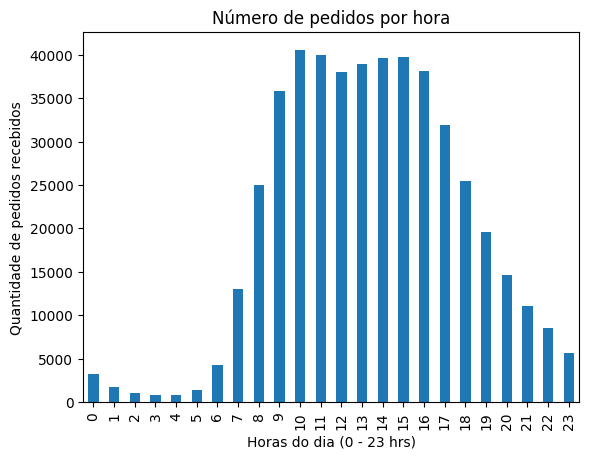

In [36]:
df_instacart_orders
pedido_hora = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()
pedido_hora.plot(kind = 'bar', xlabel = 'Horas do dia (0 - 23 hrs)', 
                 ylabel='Quantidade de pedidos recebidos', 
                 title = 'Número de pedidos por hora')
plt.show()

Escreva suas conclusões aqui

Como podemos perceber, o número de fluxos de pedidos é maior no intervalo das 9h às 17h.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente, plot e conclusão estão ok.
</div>


### [A3] Em que dia da semana as pessoas fazem compras?

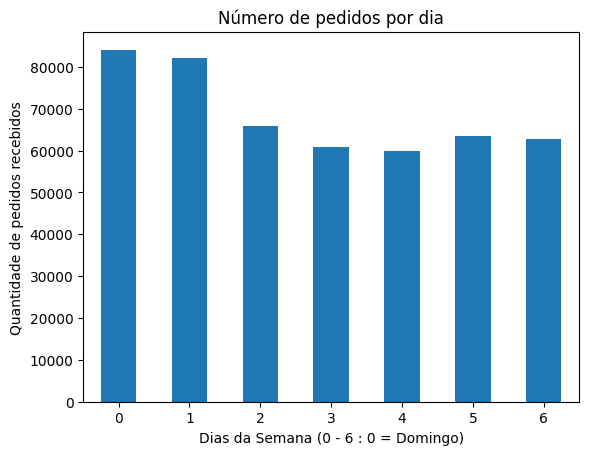

In [37]:
df_instacart_orders
pedido_hora = df_instacart_orders.groupby('order_dow')['order_id'].count()
pedido_hora.plot(kind = 'bar', xlabel = 'Dias da Semana (0 - 6 : 0 = Domingo)', 
                 ylabel='Quantidade de pedidos recebidos', 
                 title = 'Número de pedidos por dia')
plt.xticks(rotation = 0)
plt.show()

Escreva suas conclusões aqui

O número de pedidos por dia aparentemente tem uma distribuição contínua desde que a variação seja aceitável, o número de pedidos permanece entre 60 a 70 mil por dia.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente, plot e conclusão estão ok.
</div>


### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

A maioria dos utilizadores espera para fazer outra encomenda num intervalo cumulativo de 0 a 8 dias, com a particularidade de que o maior número por dia individual, que é de 51.337 utilizadores, espera 30 dias e em contrapartida, o menor número de utilizadores, o que representa 2.640 usuários, esperar 29 dias é um comportamento incomum, mas os resultados são interpretados a partir do gráfico resultante


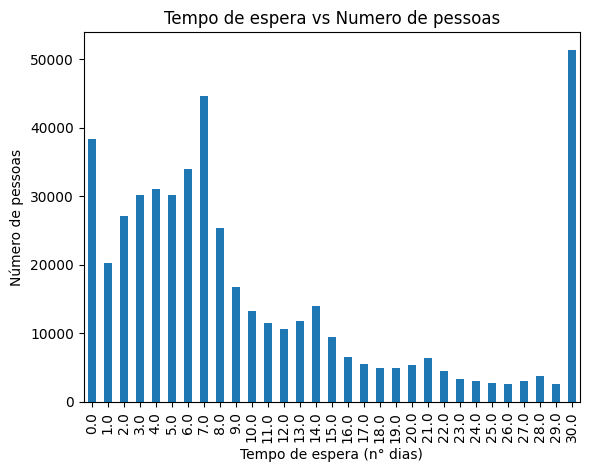

count       31.000000
mean     15450.064516
std      13927.174760
min       2640.000000
25%       4726.500000
50%      10658.000000
75%      26249.500000
max      51337.000000
Name: user_id, dtype: float64


In [38]:
df_instacart_orders

tempos_espera_pedido = df_instacart_orders.groupby('days_since_prior_order')['user_id'].count()
tempos_espera_pedido.plot(kind = 'bar', xlabel = 'Tempo de espera (n° dias)', 
                 ylabel='Número de pessoas', 
                 title = 'Tempo de espera vs Numero de pessoas')
plt.show()

print(tempos_espera_pedido.describe())



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito bom, a visualização e conslusão sobre o resultado estão de acordo.
</div>


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

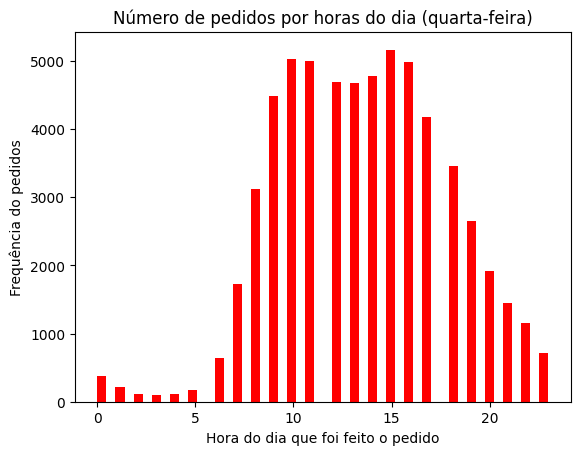

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,0.0
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0
...,...,...,...,...,...,...
478902,972799,89702,4,3,7,10.0
478931,2406747,63101,11,3,8,5.0
478941,640934,27104,9,3,10,6.0
478948,3270802,112087,2,3,13,6.0


In [39]:
quartas = df_instacart_orders[df_instacart_orders['order_dow']==3]
quartas['order_hour_of_day'].plot(kind='hist', bins=50, color='red', xlabel='Horas do dia (0 - 23 hrs)')
plt.xlabel('Hora do dia que foi feito o pedido')
plt.ylabel('Frequência do pedidos')
plt.title('Número de pedidos por horas do dia (quarta-feira)')
plt.show()

quartas

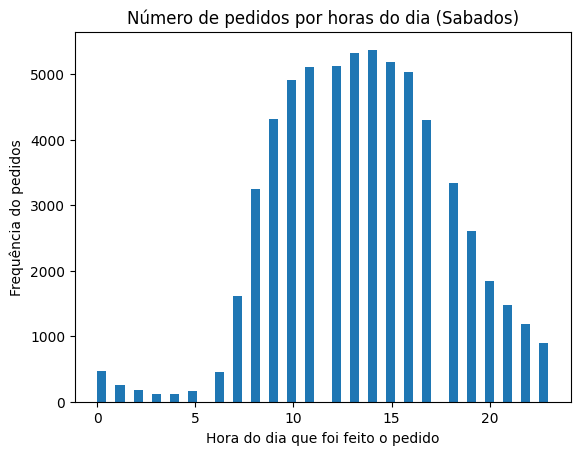

In [40]:
sabado = df_instacart_orders[df_instacart_orders['order_dow']==6]
sabado['order_hour_of_day'].plot(kind='hist', bins=50)
plt.xlabel('Hora do dia que foi feito o pedido')
plt.ylabel('Frequência do pedidos')
plt.title('Número de pedidos por horas do dia (Sabados)')

plt.show()

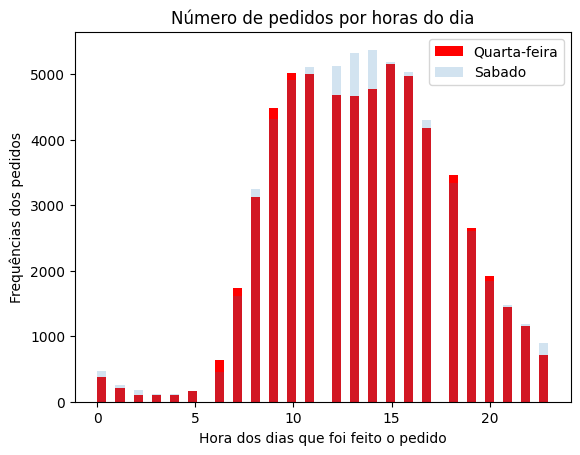

In [41]:
df_instacart_orders[df_instacart_orders['order_dow']==3]['order_hour_of_day'].plot(kind='hist', bins=50, color='red')
df_instacart_orders[df_instacart_orders['order_dow']==6]['order_hour_of_day'].plot(kind='hist', bins=50, alpha=0.2)
plt.xlabel('Hora dos dias que foi feito o pedido')
plt.ylabel('Frequências dos pedidos')
plt.title('Número de pedidos por horas do dia')
plt.legend((['Quarta-feira','Sabado']))
plt.show()


Escreva suas conclusões aqui

A diferença é pouca, os dois dias têm uma pequena diferença, mas o comportamento é semelhante a uma distribuição probabilística normal, onde a maior parte dos dados do conjunto se refere a uma variável específica (neste caso 2 variáveis/ 1-Número de pedidos por horas dias quarta-feira/ 2- Número de pedidos por hora aos sábados) estão próximos dos valores médios.

Neste caso, a maioria dos pedidos para estes dois dias são feitos entre as 9h e as 17h.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Muito bom, as visões e conclusões estão em linha com o esperado.
    
Acho muito boa essa visão de ambos os dias no mesmo plot, mas entendo que ficaria melhor se utilizasse transparência nessa geração (parâmetro alpha).
</div>


### [B2] Qual é a distribuição do número de pedidos por cliente?

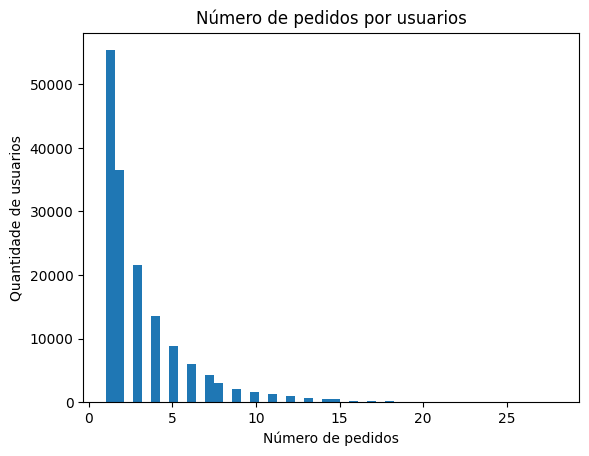

In [42]:
num_ped=df_instacart_orders.groupby('user_id')['order_id'].count()
num_ped.plot(kind='hist', bins=50)
plt.xlabel('Número de pedidos')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de pedidos por usuarios')

plt.show()


Escreva suas conclusões aqui

Podemos observar que o gráfico reflete um comportamento de uma distribuição probabilística exponencial da variável (Número de pedidos por usuários), nesse caso para inferir dados de comportamento futuro (simulações) em relação a esta variável é prático utilizar um comportamento exponencial, neste caso Especificamente, podemos perceber que a maior parte dos dados está concentrada de 0 a 5 pedidos que são feitos pela maioria dos usuários =, ou seja, temos uma grande probabilidade de que as compras de novos usuários estejam neste intervalo

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo certo com plot e conclusão.
</div>


### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [43]:
agrup_prod = df_order_products.groupby('product_id').count()
agrup_prod_ord =agrup_prod.sort_values(by='order_id', ascending = False).head(20)
agrup_prod_ord = agrup_prod_ord.sort_index()
indice = list(agrup_prod_ord.index)

filtrado_nome = df_products[df_products['product_id'].isin(indice)]
lista_val=list(filtrado_nome['product_id'])
filtrado_nome.index = lista_val
df_concat = pd.concat([agrup_prod_ord,filtrado_nome], axis='columns')


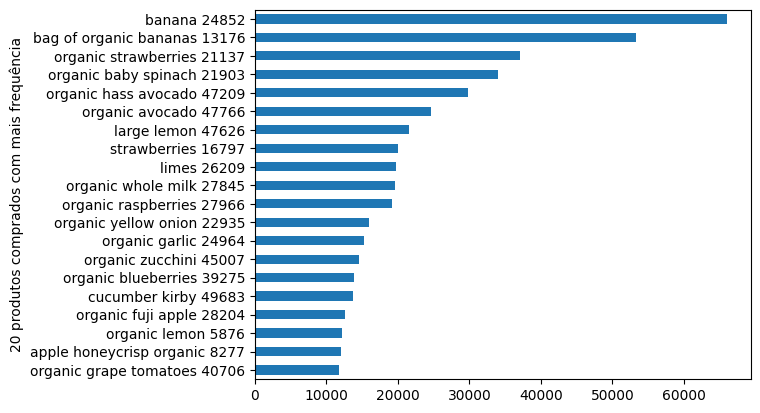

In [44]:

df_concat['product_id'] = df_concat['product_id'].astype('str')

df_concat['produtos'] = df_concat.apply(uniao_coluna, axis=1)
indices_novos = list(df_concat['produtos'])
df_concat = df_concat.set_index('produtos')
df_concat = df_concat.sort_values(by='order_id')

df_concat['order_id'].plot(kind='barh', xlabel='20 produtos comprados com mais frequência')
plt.show()

In [45]:
df_concat

,order_id,add_to_cart_order,reordered,product_id,product_name,aisle_id,department_id
produtos,,,,,,,
organic grape tomatoes 40706,11781,11781,11781,40706,organic grape tomatoes,123,4
apple honeycrisp organic 8277,11993,11993,11993,8277,apple honeycrisp organic,24,4
organic lemon 5876,12232,12232,12232,5876,organic lemon,24,4
organic fuji apple 28204,12544,12544,12544,28204,organic fuji apple,24,4
cucumber kirby 49683,13675,13675,13675,49683,cucumber kirby,83,4
organic blueberries 39275,13879,13879,13879,39275,organic blueberries,123,4
organic zucchini 45007,14584,14584,14584,45007,organic zucchini,83,4
organic garlic 24964,15292,15292,15292,24964,organic garlic,83,4
organic yellow onion 22935,15898,15898,15898,22935,organic yellow onion,83,4


Escreva suas conclusões aqui

Podemos observar que o produto com maior colocação em pedidos é o código 24852: banana, para interpretar a curva refletida pelos tempos que foram adquiridos os 20 produtos mais comprados, é importante determinar qual variável representa a curva traçada, então nós podemos definir que a curva representa a preferência dos usuários por determinados produtos, nesse sentido podemos ver que o gráfico é semelhante a uma função com distribuição exponencial onde os primeiros 2-3 códigos têm o maior percentual a ser selecionado nas compras.

    1- banana 24852	
    2- bag of organic bananas 13176	
    3- organic strawberries 21137	

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito, todos os pontos da questao foram atendidos.
</div>


# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [46]:
agrup_prod_ord = df_order_products.groupby('order_id').count()
agrup_pediso_ord = df_instacart_orders.groupby('order_id').count()
df_cont = pd.concat([agrup_pediso_ord,agrup_prod_ord],axis='columns')
df_cont[(df_cont['product_id'].isna())&(df_cont['product_id'] >1)]

coluna_prod = ['product_id']
valor_aux = 'unknown'
substituir_nan_coluna (df_cont,coluna_prod,valor_aux)

coluna_add = ['add_to_cart_order']
substituir_nan_coluna (df_cont,coluna_add,valor_aux)

coluna_reord = ['reordered']
substituir_nan_coluna (df_cont,coluna_reord,valor_aux)

agrup_concat = df_cont.groupby('product_id').count()
a['user_id'].plot(kind='bar', figsize=(15, 8))
plt.xlabel('Número itens comprados')
plt.ylabel('Quantidade de usuarios')
plt.title('Número itens comprados vs Quantidades de pessoas que os compram')

plt.show()




NameError: name 'a' is not defined

Escreva suas conclusões aqui

Claramente podemos ver uma distribuição assimétrica, com um valor atípico referente à concatenação das tabelas que precisávamos processar. Podemos ver que é um valor muito alto. Podemos ver que a quantidade de produtos adquiridos tem relação com o gráfico referente à seção de pedidos  [B2] referente ao número de pedidos por cliente, o que representa uma lógica aceitável porque representa a tendência dos pedidos feitos pelos clientes e consequentemente o comportamento dos produtos deve ser semelhante.

Podemos observar que normalmente a maioria das pessoas coloca entre 2 e 9 produtos em seus pedidos para serem adquiridos.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho com o gráfico e conclusão.
</div>


### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

Escreva suas conclusões aqui

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

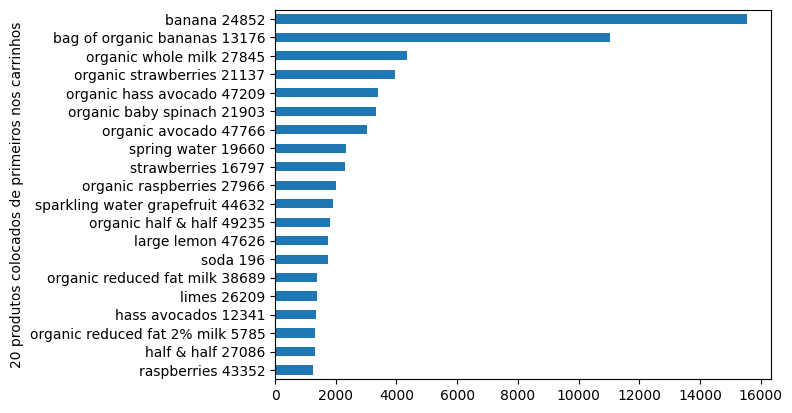

,order_id,add_to_cart_order,reordered,product_id,product_name,aisle_id,department_id
produtos,,,,,,,
raspberries 43352,1246,1246,1246,43352,raspberries,32,4
half & half 27086,1309,1309,1309,27086,half & half,53,16
organic reduced fat 2% milk 5785,1310,1310,1310,5785,organic reduced fat 2% milk,84,16
hass avocados 12341,1340,1340,1340,12341,hass avocados,32,4
limes 26209,1370,1370,1370,26209,limes,24,4
organic reduced fat milk 38689,1397,1397,1397,38689,organic reduced fat milk,84,16
soda 196,1733,1733,1733,196,soda,77,7
large lemon 47626,1737,1737,1737,47626,large lemon,24,4
organic half & half 49235,1797,1797,1797,49235,organic half & half,53,16


In [47]:
filtro = df_order_products[df_order_products['add_to_cart_order']==1]
filtro = filtro.groupby('product_id').count()
filtro = filtro.sort_values(by='add_to_cart_order', ascending=False).head(20)
filtro = filtro.sort_index()
indice = list(filtro.index)
filtrado_nome = df_products[df_products['product_id'].isin(indice)]
w = list(filtrado_nome['product_id'])
filtrado_nome.index = w

df_concaten = pd.concat([filtro,filtrado_nome], axis='columns')
df_concaten
df_concaten['product_id'] = df_concaten['product_id'].astype('str')


df_concaten['produtos'] = df_concaten.apply(uniao_coluna, axis=1)
indices_novos = list(df_concaten['produtos'])
df_concaten = df_concaten.set_index('produtos')
df_concaten = df_concaten.sort_values(by='add_to_cart_order')

df_concaten['add_to_cart_order'].plot(kind='barh', xlabel='20 produtos colocados de primeiros nos carrinhos')
plt.show()
df_concaten


Escreva suas conclusões aqui

É importante ressaltar que os dados são semelhantes aos da seção [B3] ou dos 20 produtos mais populares, e é lógico que nos preferidos nas compras, a tendência é semelhante nos itens que são colocados primeiro nos carrinhos, se observamos em os detalhes: A maior parte dos produtos mais comprados estão nos produtos colocados primeiro nos carrinhos de compras.


É importante ver que os primeiros produtos são semelhantes ao gráfico da seção [B3] e tendo um gráfico com uma variável que representa a preferência dos usuários na hora de fazer suas compras e podemos ver que a curva tem uma tendência exponencial significa que o primeiros itens têm alta probabilidade nas compras feitas pelos usuários

    1- banana 24852	
    2- bag of organic bananas 13176
    3- organic whole milk 27845
    4- organic strawberries 21137

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito! O gráfico endereça com clareza os pontos da questão!
</div>


# Conclusão geral do projeto:

O objetivo principal era limpar os dados e preparar um relatório que forneça informações sobre os hábitos de compra dos clientes
da Instacart, Podemos descrever que foi realizado a partir de uma amostra de registros em um período determinado e fornecido pela empresa.

Uma das coisas mais interessantes do projeto do meu ponto de vista é a inter-relação das informações, como tivemos que estabelecer entidades:

    * Tabela de ordens
    * Tabela Ordens_products
    * Tabela products
    * Tabela departments
    * Tabela aisles
    
e determinar as ligações entre os elementos internos de cada entidade (diagrama entidade-relacionamento) e identificar os elementos-chave (ID) que permitiram o relacionamento entre elas e como essas relações foram necessárias para estabelecer os vínculos que nos permitiram criar os filtros necessários para cada questão.

Podemos agora verificar que a etapa de limpeza é muito importante para entrar em outra de igual interesse como a representação gráfica da informação que é apresentada à empresa, trabalho que nos permite analisar melhor a informação contida em tabelas de centenas, milhares e milhões de linhas de informação.

Embora nosso objetivo tenha sido determinar a preferência dos usuários, implicitamente este estudo permitiu observar o comportamento da demanda de todos os códigos de produtos cadastrados pela empresa para venda através do APP, fato muito importante a título de exemplo para citar apenas três: 

    1- para as previsões de demanda por produto.
    2- o estabelecimento de modelos de estoque que otimizem as quantidades de cada produto em estoque para minimizar os custos de armazenamento.
    3- estabelecer planos de vendas projetados que forneçam as informações necessárias ao planejamento financeiro da empresa por meio da formulação de seus orçamentos de receitas e despesas.

É importante entender que cada variável, por exemplo cada produto adquirido (código = 500) pelos usuários, é uma variável e se encontra dentro de um conjunto de dados “não tabulados” que para analisar seu comportamento precisa ser tratado por estatística descritiva métodos que vão descrever precisamente seu comportamento e se quisermos projeções de seu comportamento, os dados da variável (nesta descrição: comportamento do código 500) devem ser estabelecidas hipóteses que nos permitam determinar se o comportamento do código os dados obedecem a uma determinada distribuição probabilística com esta conclusão para este código podemos inferir resultados, é importante observar que cada código do 49694 analisado possui comportamentos de demanda ou preferência diferentes para os clientes.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a conclusão!
</div>
